 Welcome to my project for the "Introduction to Programming" course.

 With this file you can retrieve various metrics about a stock from Quandl.
 You will be asked to enter a ticker, which is the abbreviation for your desired stock to analyse.
 Further you will be asked to define the timeframe on which you want to base your retrieval.
 But please remember to keep it longer than one year, else you will not be able to see the volatility.
 Additionally there is a problem with data retrieval from Quandl if you do not have a premium account.
 Since I do not have one, the data is unfortunately only available until the 2018-03-27. However, if you do have
 a premium account, you can just insert your API, where mine is right now (in first row of code after imports).
 Have fun!



Enter the ticker of the stock you want to analyse:  aapl
Start date: Enter the date from when you want to analyse the stock (use following format: YYYY-MM-DD): 2000-1-1
End date: Enter the date until when you want to analyse the stock (use following format: YYYY-MM-DD): 2010-1-1



These were the adjusted closing prices of aapl for the last 30 days, starting at 2010-1-1 :
 ticker           AAPL
date                 
2009-12-31  27.081999
2009-12-30  27.198690
2009-12-29  26.872264
2009-12-28  27.194834
2009-12-24  26.864554
2009-12-23  25.972667
2009-12-22  25.749053
2009-12-21  25.475318
2009-12-18  25.115479
2009-12-17  24.656684
2009-12-16  25.064073
2009-12-15  24.953551
2009-12-14  25.314675
2009-12-11  25.017808
2009-12-10  25.243993
2009-12-09  25.420057
2009-12-08  24.400941
2009-12-07  24.282709
2009-12-04  24.844314
2009-12-03  25.250418
2009-12-02  25.218290
2009-12-01  25.313390
2009-11-30  25.691221
2009-11-27  25.778611
2009-11-25  26.241261
2009-11-24  26.273389
2009-11-23  26.458449
2009-11-20  25.692506
2009-11-19  25.768330
2009-11-18  26.468731 



Enter the timeframe for the short moving average (example: 40): 40
Enter the timeframe for the long moving average (example: 252 (is one trading year)): 100


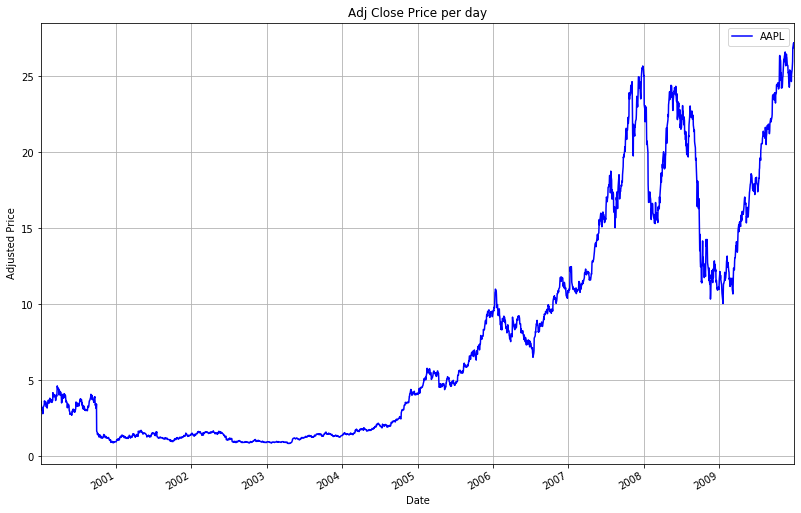

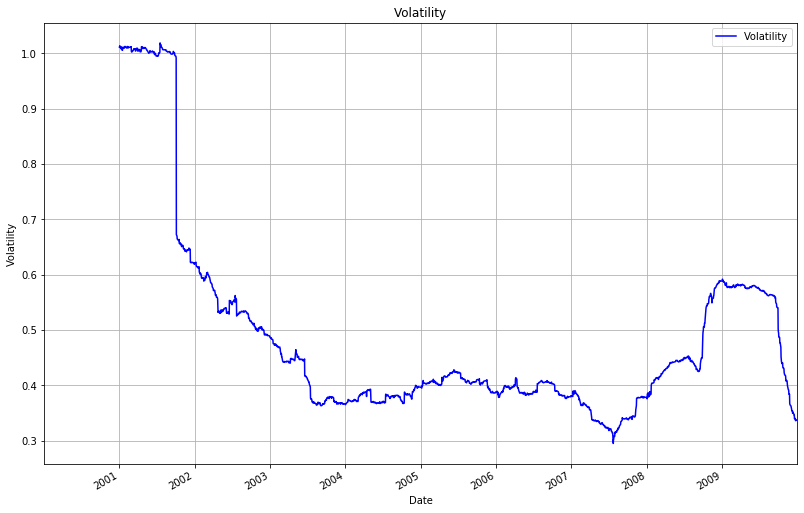

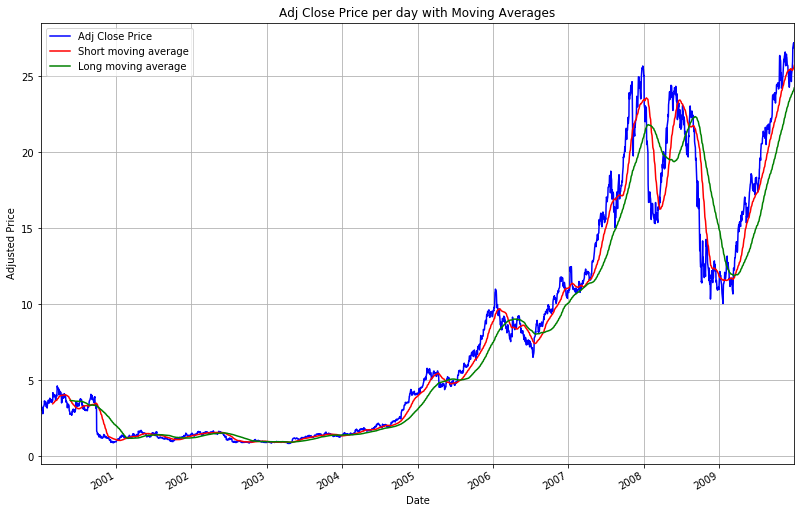

This information can be used as an indication for the stock trend. If for example the red line (short moving average of, 40 days)
surpasses the green line (long moving average of, 100 days), this can be used as a signal to buy the stock. 
Likewise it can be used as a signal to sell, when the red line falls again below the green line.



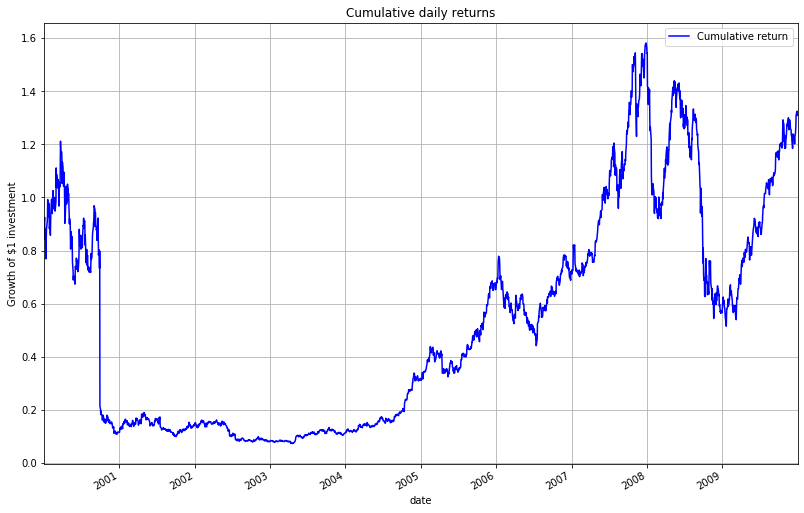

For every dollar you were to invest on 2000-1-1 you would have as of 2010-1-1 : 1.32 dollars.



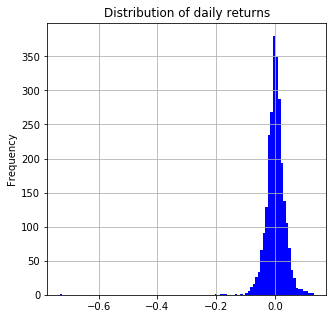


Statistics about the daily returns:
 count    2514.000000
mean        0.000803
std         0.033641
min        -0.731247
25%        -0.015873
50%         0.000708
75%         0.017648
max         0.130194
Name: log_ret, dtype: float64 

Lastly, we want to calculate the risk that you are exposed to if you have stocks from your selected stock on the 2010-1-1 . 
In order to calculate the risk you will have to enter the amount of dollars that you have invested in this stock.
 Additionally you have to enter, in percentage, which level of confirmation you want to have.



How big is the value of your portfolio that you have invested in this stock?
 100

Enter the probability that should be used for the VaR calculation
For example if you want to use 95% quantile enter 0.95: 0.88



This is the z-value that was used for the calculation: 1.175

This is the daily VaR for this stock of your portfolio with a worth of 100.0 dollars: 2.5 dollars

This means that in 12.0 % of the cases the loss in portfolio value over one trading day may exceed 2.5 dollars.

This also means that 2.5 % of your portfolio invested in this stock is at risk today.


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quandl
from pandas_datareader import data, wb
import datetime as dt
import scipy.stats as st

#add quandl API key for unrestricted
quandl.ApiConfig.api_key = 'vqwrEn3pgVNHVFy_psxK'

#welcoming user
print(' Welcome to my project for the "Introduction to Programming" course.\n\n',
'With this file you can retrieve various metrics about a stock from Quandl.\n',
'You will be asked to enter a ticker, which is the abbreviation for your desired stock to analyse.\n',
'Further you will be asked to define the timeframe on which you want to base your retrieval.\n',
'But please remember to keep it longer than one year, else you will not be able to see the volatility.\n',
'Additionally there is a problem with data retrieval from Quandl if you do not have a premium account.\n',
'Since I do not have one, the data is unfortunately only available until the 2018-03-27. However, if you do have\n',
'a premium account, you can just insert your API, where mine is right now (in first row of code after imports).\n',
'Have fun!\n')

#define inputs
stock = str(input('Enter the ticker of the stock you want to analyse: '))
start_date = str(input('Start date: Enter the date from when you want to analyse the stock (use following format: YYYY-MM-DD):'))
end_date = str(input('End date: Enter the date until when you want to analyse the stock (use following format: YYYY-MM-DD):'))

# get the table for daily stock prices
data = quandl.get_table('WIKI/PRICES', ticker = stock, 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': start_date, 'lte': end_date }, 
                        paginate=True)

#create a new dataframe with 'date' column as index
new = data.set_index('date')

#use pandas pivot function to sort adj_close by tickers
clean_data = new.pivot(columns='ticker')

#print adj closing prices of last month
print('\nThese were the adjusted closing prices of', stock, 'for the last 30 days, starting at', end_date, ':\n', clean_data['adj_close'].sort_index(ascending = False).head(30), '\n')

#plot adjusted closing price
clean_data['adj_close'].plot(figsize=(13.5,9), title='Adj Close Price per day', color=['blue'], grid=True)
plt.ylabel("Adjusted Price")
plt.xlabel("Date")
plt.legend()

#calculate the logarithmic returns using the closing price 
clean_data['log_ret'] = np.log(clean_data['adj_close'] / clean_data['adj_close'].shift(1))

#calculate volatility using rolling standard deviation 
clean_data['volatility'] = clean_data['log_ret'].rolling(252).std() * np.sqrt(252)

#plot the volatility
clean_data[['volatility']].plot(figsize=(13.5, 9), title='Volatility', color='blue', grid=True)
vola_label = ['Volatility']
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.legend(vola_label)

#input for timeframes of moving averages
s_ma = int(input('Enter the timeframe for the short moving average (example: 40):'))
l_ma = int(input('Enter the timeframe for the long moving average (example: 252 (is one trading year)):'))

#short moving average
clean_data['short_ma'] = clean_data['adj_close'].rolling(s_ma).mean()

#long moving average
clean_data['long_ma'] = clean_data['adj_close'].rolling(l_ma).mean()

#plot the adjusted closing price, short and long moving average
ma_labels = ['Adj Close Price', 'Short moving average', 'Long moving average']
clean_data[['adj_close', 'short_ma', 'long_ma']].plot(figsize=(13.5, 9), title='Adj Close Price per day with Moving Averages', color=['blue', 'red', 'green'], grid=True)
plt.ylabel("Adjusted Price")
plt.xlabel("Date")
plt.legend(ma_labels)
plt.show()

print('This information can be used as an indication for the stock trend. If for example the red line (short moving average of,', s_ma, 'days)'
      '\nsurpasses the green line (long moving average of,', l_ma, 'days), this can be used as a signal to buy the stock. \nLikewise it can be used as a',
     'signal to sell, when the red line falls again below the green line.\n')


#create callable function for percentage change in daily returns
daily_return = clean_data['log_ret']


#calculate cumulative daily returns
cum_daily_return = (1 + daily_return).cumprod()

#plot cumulative daily returns
cum_label = ['Cumulative return']
fig = plt.figure(figsize=(13.5,9))
cum_daily_return.plot(figsize=(13.5, 9), color='blue', title='Cumulative daily returns', grid=True).set_ylabel("Growth of $1 investment")
plt.legend(cum_label)
plt.show()

#show what investment per one dollar would be worth today
inv_one_dollar_now = (1 + daily_return).cumprod().tail(1)
print('For every dollar you were to invest on', start_date, 'you would have as of', end_date, ':', round(inv_one_dollar_now[0],2), 'dollars.\n')

#plot the distribution of the daily returns
fig = plt.figure(figsize=(13.5,9))
daily_return.plot.hist(bins=100, figsize=(5, 5), color='blue', grid=True, title='Distribution of daily returns')

#show the plot
plt.title('Distribution of daily returns')
plt.show()

#show summary about daily return statistics
print('\nStatistics about the daily returns:\n', daily_return.describe(),'\n')


#calculate the value at risk (VaR)
print('Lastly, we want to calculate the risk that you are exposed to if you have stocks from your selected stock on the', end_date,
     '. \nIn order to calculate the risk you will have to enter the amount of dollars that you have invested in this stock.\n',
     'Additionally you have to enter, in percentage, which level of confirmation you want to have.\n')
#input of portfolio worth
portf_value = float(input('How big is the value of your portfolio that you have invested in this stock?\n'))

#calculate z-value
probab = float(input('\nEnter the probability that should be used for the VaR calculation\nFor example if you want to use 95% quantile enter 0.95:'))
z_value = (st.norm.ppf(probab))

#calculate VaR
VaR = portf_value * (clean_data['volatility'].tail(1)/ np.sqrt(252)) * z_value

#print VaR and interpretation of result
print('\nThis is the z-value that was used for the calculation:', round(z_value,3))
print('\nThis is the daily VaR for this stock of your portfolio with a worth of', portf_value, 'dollars:', round(VaR[0],1), 'dollars')
print('\nThis means that in', round((1-probab)*100,1), '% of the cases the loss in portfolio value over one trading day may exceed', round(VaR[0],1), 'dollars.')
print('\nThis also means that', round((VaR[0]/portf_value)*100,1), '% of your portfolio invested in this stock is at risk today.')